In [251]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [252]:
train_data = pd.read_csv("train.csv")
train_data.head()

,sourceCity,sourceCountry,destinationCity,destinationCountry,truckType,perAssignmentPrice,Start Date,Week
0,Riyadh,KSA,Riyadh,KSA,21,800.0,2020-07-01,4
1,Riyadh,KSA,Riyadh,KSA,21,330.0,2020-06-30,3
2,Riyadh,KSA,Riyadh,KSA,21,120.0,2020-09-14,2
3,Tiles Plant 2,KSA,Amajiah,KSA,21,120.0,2020-06-03,4
4,Jeddah,KSA,Dubai,UAE,21,1900.0,2020-10-05,2


In [253]:
train_data.shape

(7984, 8)

In [254]:
train_data["Shipment_day"]=pd.to_datetime(train_data["Start Date"],format = "%Y-%m-%d").dt.day
train_data["Shipment_week"]=pd.to_datetime(train_data["Start Date"],format = "%Y-%m-%d").dt.dayofweek
train_data["Shipment_month"]=pd.to_datetime(train_data["Start Date"],format = "%Y-%m-%d").dt.month

train_data.head()

,sourceCity,sourceCountry,destinationCity,destinationCountry,truckType,perAssignmentPrice,Start Date,Week,Shipment_day,Shipment_week,Shipment_month
0,Riyadh,KSA,Riyadh,KSA,21,800.0,2020-07-01,4,1,2,7
1,Riyadh,KSA,Riyadh,KSA,21,330.0,2020-06-30,3,30,1,6
2,Riyadh,KSA,Riyadh,KSA,21,120.0,2020-09-14,2,14,0,9
3,Tiles Plant 2,KSA,Amajiah,KSA,21,120.0,2020-06-03,4,3,2,6
4,Jeddah,KSA,Dubai,UAE,21,1900.0,2020-10-05,2,5,0,10


In [255]:
train_data.drop(["Start Date"], axis = 1,inplace = True)
train_data.drop(["Week"], axis = 1,inplace = True)

In [256]:
train_data.drop(["sourceCountry"], axis = 1,inplace = True)

In [257]:
train_data.head()

,sourceCity,destinationCity,destinationCountry,truckType,perAssignmentPrice,Shipment_day,Shipment_week,Shipment_month
0,Riyadh,Riyadh,KSA,21,800.0,1,2,7
1,Riyadh,Riyadh,KSA,21,330.0,30,1,6
2,Riyadh,Riyadh,KSA,21,120.0,14,0,9
3,Tiles Plant 2,Amajiah,KSA,21,120.0,3,2,6
4,Jeddah,Dubai,UAE,21,1900.0,5,0,10


In [258]:
train_data.drop(train_data[train_data['destinationCountry'] == "ksa"].index, inplace = True) 
train_data.drop(train_data[train_data['destinationCity'] == "Amajiah  "].index, inplace = True) 


In [259]:
train_data["destinationCountry"].value_counts()


KSA        6902
UAE         892
Kuwait      111
Bahrain      66
Name: destinationCountry, dtype: int64

In [260]:
train_data["truckType"].value_counts()


21    7601
22     276
4       61
1       10
19       9
23       7
3        2
18       2
24       2
17       1
Name: truckType, dtype: int64

In [261]:
train_data["destinationCity"].value_counts()

Riyadh            2458
Amajiah           1135
Dubai              772
Ad Diriyah         426
Jeddah             417
Dammam             401
Taif               325
Hail               317
Al Rashid          253
Hafar Al Batin     218
Buraydah           200
Al Hofuf           182
Tabuk              140
Abu Dhabi          121
Kuwait             117
Medina              97
Al Khobar           97
Al Duwadimi         85
Bahrain             83
Al Jubail           67
Tammamah            60
Name: destinationCity, dtype: int64

In [262]:
train_data["sourceCity"].value_counts()

Riyadh           5250
Tiles Plant 2    1695
Jeddah            710
Al Jubail         233
Dammam             83
Name: sourceCity, dtype: int64

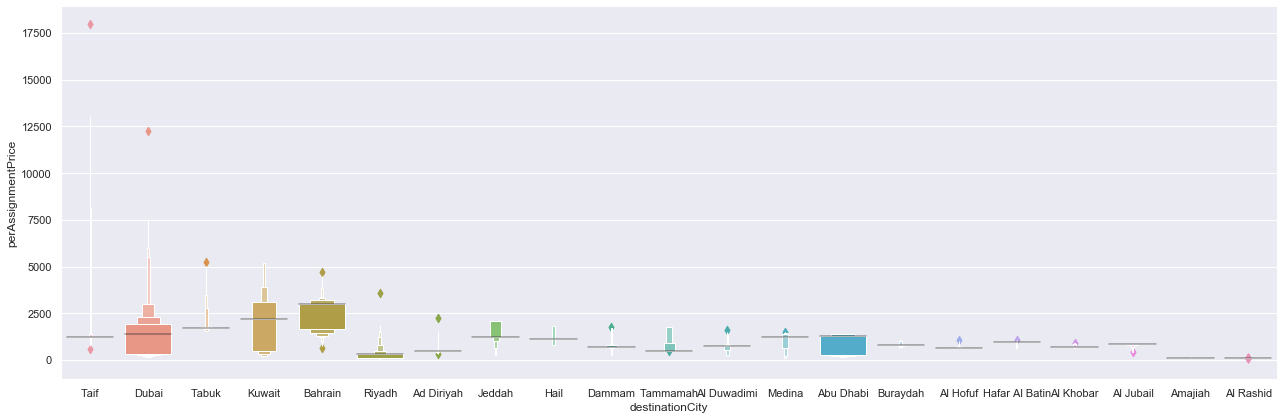

In [263]:
sns.catplot(y="perAssignmentPrice",x="destinationCity",data= train_data.sort_values("perAssignmentPrice", ascending = False),kind="boxen",height=6, aspect = 3) 

In [264]:
#oneHotEncoding

destinationCity = train_data[["destinationCity"]]
destinationCity  = pd.get_dummies(destinationCity,drop_first= True)
destinationCity.head()
#abudhabidroped
destinationCity.columns

Index(['destinationCity_Ad Diriyah', 'destinationCity_Al Duwadimi',
       'destinationCity_Al Hofuf', 'destinationCity_Al Jubail',
       'destinationCity_Al Khobar', 'destinationCity_Al Rashid',
       'destinationCity_Amajiah', 'destinationCity_Bahrain',
       'destinationCity_Buraydah', 'destinationCity_Dammam',
       'destinationCity_Dubai', 'destinationCity_Hafar Al Batin',
       'destinationCity_Hail', 'destinationCity_Jeddah',
       'destinationCity_Kuwait', 'destinationCity_Medina',
       'destinationCity_Riyadh', 'destinationCity_Tabuk',
       'destinationCity_Taif', 'destinationCity_Tammamah'],
      dtype='object')

In [265]:
#oneHotEncoding

destinationCountry = train_data[["destinationCountry"]]
destinationCountry  = pd.get_dummies(destinationCountry,drop_first= True)
destinationCountry.head()
#Bahrain


,destinationCountry_KSA,destinationCountry_Kuwait,destinationCountry_UAE
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


In [266]:
#oneHotEncoding

sourceCity = train_data[["sourceCity"]]
sourceCity  = pd.get_dummies(sourceCity,drop_first= True)
sourceCity.head()
#Al Jubail 


,sourceCity_Dammam,sourceCity_Jeddah,sourceCity_Riyadh,sourceCity_Tiles Plant 2
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,1,0,0


In [267]:
data_train = pd.concat([train_data , destinationCity ], axis =1)
data_train = pd.concat([data_train , destinationCountry,sourceCity ], axis =1)
data_train.head()

,sourceCity,destinationCity,destinationCountry,truckType,perAssignmentPrice,Shipment_day,Shipment_week,Shipment_month,destinationCity_Ad Diriyah,destinationCity_Al Duwadimi,...,destinationCity_Tabuk,destinationCity_Taif,destinationCity_Tammamah,destinationCountry_KSA,destinationCountry_Kuwait,destinationCountry_UAE,sourceCity_Dammam,sourceCity_Jeddah,sourceCity_Riyadh,sourceCity_Tiles Plant 2
0,Riyadh,Riyadh,KSA,21,800.0,1,2,7,0,0,...,0,0,0,1,0,0,0,0,1,0
1,Riyadh,Riyadh,KSA,21,330.0,30,1,6,0,0,...,0,0,0,1,0,0,0,0,1,0
2,Riyadh,Riyadh,KSA,21,120.0,14,0,9,0,0,...,0,0,0,1,0,0,0,0,1,0
3,Tiles Plant 2,Amajiah,KSA,21,120.0,3,2,6,0,0,...,0,0,0,1,0,0,0,0,0,1
4,Jeddah,Dubai,UAE,21,1900.0,5,0,10,0,0,...,0,0,0,0,0,1,0,1,0,0


In [268]:
data_train.drop(["sourceCity"], axis = 1,inplace = True)
data_train.drop(["destinationCity"], axis = 1,inplace = True)
data_train.drop(["destinationCountry"], axis = 1,inplace = True)


In [269]:
data_train.head()

,truckType,perAssignmentPrice,Shipment_day,Shipment_week,Shipment_month,destinationCity_Ad Diriyah,destinationCity_Al Duwadimi,destinationCity_Al Hofuf,destinationCity_Al Jubail,destinationCity_Al Khobar,...,destinationCity_Tabuk,destinationCity_Taif,destinationCity_Tammamah,destinationCountry_KSA,destinationCountry_Kuwait,destinationCountry_UAE,sourceCity_Dammam,sourceCity_Jeddah,sourceCity_Riyadh,sourceCity_Tiles Plant 2
0,21,800.0,1,2,7,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,21,330.0,30,1,6,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,21,120.0,14,0,9,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,21,120.0,3,2,6,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,21,1900.0,5,0,10,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [270]:
test_data = pd.read_csv("test.csv")


In [271]:
test_data["Shipment_day"]=pd.to_datetime(test_data["Start Date"],format = "%Y-%m-%d").dt.day
test_data["Shipment_week"]=pd.to_datetime(test_data["Start Date"],format = "%Y-%m-%d").dt.dayofweek
test_data["Shipment_month"]=pd.to_datetime(test_data["Start Date"],format = "%Y-%m-%d").dt.month

In [272]:
test_data.drop(["Start Date"], axis = 1,inplace = True)
test_data.drop(["Week"], axis = 1,inplace = True)
test_data.drop(["sourceCountry"], axis = 1,inplace = True)

In [273]:
test_data["sourceCity"].value_counts()


Riyadh           902
Tiles Plant 2    313
Jeddah           132
Al Jubail         34
Dammam            10
Name: sourceCity, dtype: int64

In [274]:
train_data["sourceCity"].value_counts()

Riyadh           5250
Tiles Plant 2    1695
Jeddah            710
Al Jubail         233
Dammam             83
Name: sourceCity, dtype: int64

In [275]:
test_data["destinationCountry"].value_counts()
test_data.drop(test_data[test_data['destinationCity'] == "Amajiah  "].index, inplace = True) 


In [276]:
#oneHotEncoding

destinationCity = test_data[["destinationCity"]]
destinationCity  = pd.get_dummies(destinationCity,drop_first= True)
destinationCity.head()
#abudhabidroped
destinationCity.columns

Index(['destinationCity_Ad Diriyah', 'destinationCity_Al Duwadimi',
       'destinationCity_Al Hofuf', 'destinationCity_Al Jubail',
       'destinationCity_Al Khobar', 'destinationCity_Al Rashid',
       'destinationCity_Amajiah', 'destinationCity_Bahrain',
       'destinationCity_Buraydah', 'destinationCity_Dammam',
       'destinationCity_Dubai', 'destinationCity_Hafar Al Batin',
       'destinationCity_Hail', 'destinationCity_Jeddah',
       'destinationCity_Kuwait', 'destinationCity_Medina',
       'destinationCity_Riyadh', 'destinationCity_Tabuk',
       'destinationCity_Taif', 'destinationCity_Tammamah'],
      dtype='object')

In [277]:
#oneHotEncoding

destinationCountry = test_data[["destinationCountry"]]
destinationCountry  = pd.get_dummies(destinationCountry,drop_first= True)
destinationCountry.head()
#Bahrain


,destinationCountry_KSA,destinationCountry_Kuwait,destinationCountry_UAE
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [278]:
#oneHotEncoding

sourceCity = test_data[["sourceCity"]]
sourceCity  = pd.get_dummies(sourceCity,drop_first= True)
sourceCity.head()
#Al Jubail 


,sourceCity_Dammam,sourceCity_Jeddah,sourceCity_Riyadh,sourceCity_Tiles Plant 2
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,0,0,1


In [279]:
data_test = pd.concat([test_data , destinationCity ], axis =1)
data_test = pd.concat([data_test , destinationCountry,sourceCity ], axis =1)
data_test.head()

,sourceCity,destinationCity,destinationCountry,truckType,perAssignmentPrice,Shipment_day,Shipment_week,Shipment_month,destinationCity_Ad Diriyah,destinationCity_Al Duwadimi,...,destinationCity_Tabuk,destinationCity_Taif,destinationCity_Tammamah,destinationCountry_KSA,destinationCountry_Kuwait,destinationCountry_UAE,sourceCity_Dammam,sourceCity_Jeddah,sourceCity_Riyadh,sourceCity_Tiles Plant 2
0,Riyadh,Riyadh,KSA,21,330.0,26,2,8,0,0,...,0,0,0,1,0,0,0,0,1,0
1,Tiles Plant 2,Amajiah,KSA,21,120.0,9,1,6,0,0,...,0,0,0,1,0,0,0,0,0,1
2,Tiles Plant 2,Amajiah,KSA,21,120.0,28,1,4,0,0,...,0,0,0,1,0,0,0,0,0,1
3,Riyadh,Jeddah,KSA,21,1225.0,22,3,10,0,0,...,0,0,0,1,0,0,0,0,1,0
4,Tiles Plant 2,Al Rashid,KSA,21,100.0,21,1,4,0,0,...,0,0,0,1,0,0,0,0,0,1


In [280]:
data_test.drop(["sourceCity"], axis = 1,inplace = True)
data_test.drop(["destinationCity"], axis = 1,inplace = True)
data_test.drop(["destinationCountry"], axis = 1,inplace = True)


In [281]:
data_test.head()

,truckType,perAssignmentPrice,Shipment_day,Shipment_week,Shipment_month,destinationCity_Ad Diriyah,destinationCity_Al Duwadimi,destinationCity_Al Hofuf,destinationCity_Al Jubail,destinationCity_Al Khobar,...,destinationCity_Tabuk,destinationCity_Taif,destinationCity_Tammamah,destinationCountry_KSA,destinationCountry_Kuwait,destinationCountry_UAE,sourceCity_Dammam,sourceCity_Jeddah,sourceCity_Riyadh,sourceCity_Tiles Plant 2
0,21,330.0,26,2,8,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,21,120.0,9,1,6,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,21,120.0,28,1,4,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,21,1225.0,22,3,10,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,21,100.0,21,1,4,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


## Feature Selection


In [282]:
data_train.columns

Index(['truckType', 'perAssignmentPrice', 'Shipment_day', 'Shipment_week',
       'Shipment_month', 'destinationCity_Ad Diriyah',
       'destinationCity_Al Duwadimi', 'destinationCity_Al Hofuf',
       'destinationCity_Al Jubail', 'destinationCity_Al Khobar',
       'destinationCity_Al Rashid', 'destinationCity_Amajiah',
       'destinationCity_Bahrain', 'destinationCity_Buraydah',
       'destinationCity_Dammam', 'destinationCity_Dubai',
       'destinationCity_Hafar Al Batin', 'destinationCity_Hail',
       'destinationCity_Jeddah', 'destinationCity_Kuwait',
       'destinationCity_Medina', 'destinationCity_Riyadh',
       'destinationCity_Tabuk', 'destinationCity_Taif',
       'destinationCity_Tammamah', 'destinationCountry_KSA',
       'destinationCountry_Kuwait', 'destinationCountry_UAE',
       'sourceCity_Dammam', 'sourceCity_Jeddah', 'sourceCity_Riyadh',
       'sourceCity_Tiles Plant 2'],
      dtype='object')

In [283]:
X= data_train.loc[:,['Shipment_day', 'Shipment_week',
       'Shipment_month', 'destinationCity_Ad Diriyah',
       'destinationCity_Al Duwadimi', 'destinationCity_Al Hofuf',
       'destinationCity_Al Jubail', 'destinationCity_Al Khobar',
       'destinationCity_Al Rashid', 'destinationCity_Amajiah',
        'destinationCity_Bahrain',
       'destinationCity_Buraydah', 'destinationCity_Dammam',
       'destinationCity_Dubai', 'destinationCity_Hafar Al Batin',
       'destinationCity_Hail', 'destinationCity_Jeddah',
       'destinationCity_Kuwait', 'destinationCity_Medina',
       'destinationCity_Riyadh', 'destinationCity_Tabuk',
       'destinationCity_Taif', 'destinationCity_Tammamah',
       'destinationCountry_KSA', 'destinationCountry_Kuwait',
       'destinationCountry_UAE', 'sourceCity_Dammam', 'sourceCity_Jeddah',
       'sourceCity_Riyadh', 'sourceCity_Tiles Plant 2']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7971 entries, 0 to 7983
Data columns (total 30 columns):
Shipment_day                      7971 non-null int64
Shipment_week                     7971 non-null int64
Shipment_month                    7971 non-null int64
destinationCity_Ad Diriyah        7971 non-null uint8
destinationCity_Al Duwadimi       7971 non-null uint8
destinationCity_Al Hofuf          7971 non-null uint8
destinationCity_Al Jubail         7971 non-null uint8
destinationCity_Al Khobar         7971 non-null uint8
destinationCity_Al Rashid         7971 non-null uint8
destinationCity_Amajiah           7971 non-null uint8
destinationCity_Bahrain           7971 non-null uint8
destinationCity_Buraydah          7971 non-null uint8
destinationCity_Dammam            7971 non-null uint8
destinationCity_Dubai             7971 non-null uint8
destinationCity_Hafar Al Batin    7971 non-null uint8
destinationCity_Hail              7971 non-null uint8
destinationCity_Jeddah       

In [284]:
y= data_train.iloc[:,1]
y.head()

0     800.0
1     330.0
2     120.0
3     120.0
4    1900.0
Name: perAssignmentPrice, dtype: float64

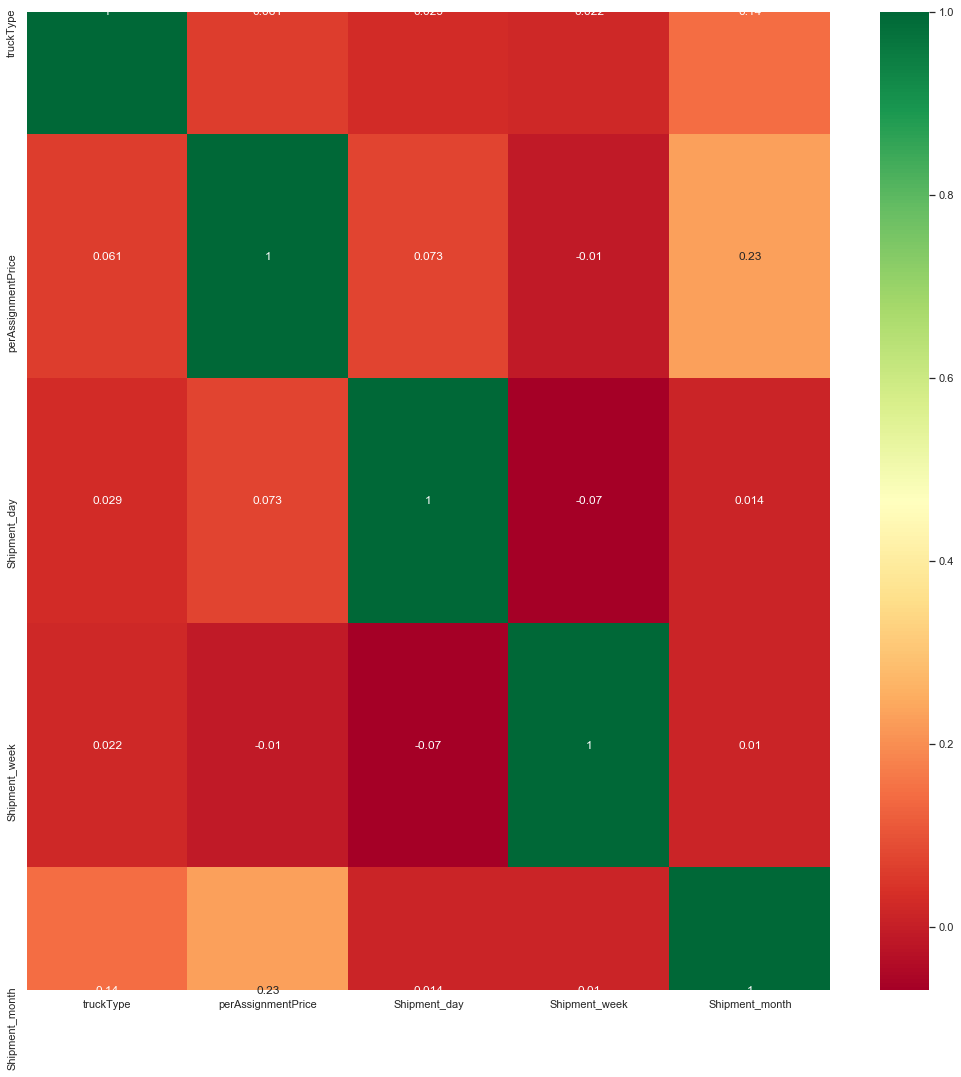

In [285]:
#lets find correlation
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot =True, cmap ="RdYlGn")

In [286]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

C:\Users\ankita\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [287]:
print(selection.feature_importances_)

[3.64126213e-02 2.19975695e-02 3.17883447e-01 2.92917312e-02
 3.24855546e-05 9.70182262e-05 3.47963010e-04 6.59726252e-06
 1.27267265e-03 2.73011370e-02 8.72163239e-03 4.52197415e-04
 7.18675229e-06 8.33168320e-03 2.46759796e-03 6.31114554e-03
 1.36629846e-02 1.12398347e-03 4.41277337e-03 1.01652757e-01
 1.92039397e-02 1.09862351e-02 1.75405071e-04 2.05257880e-01
 2.60765735e-03 2.69262298e-02 1.01057985e-03 4.09566132e-02
 1.19252357e-02 9.91630404e-02]


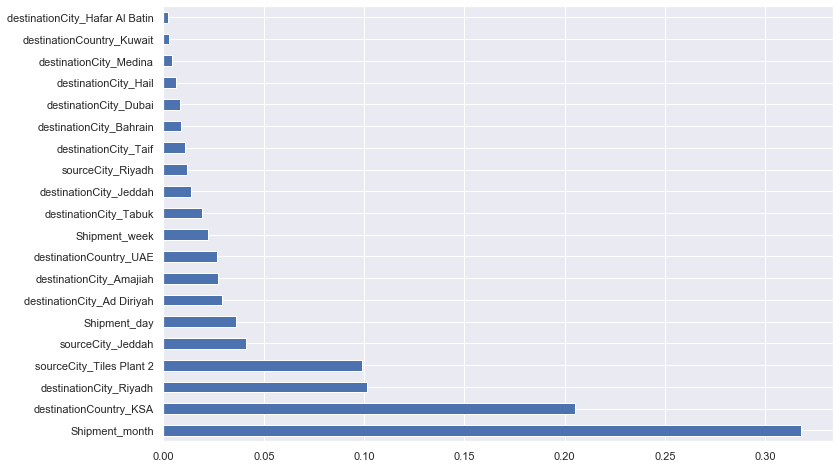

In [288]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [289]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [290]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

C:\Users\ankita\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [291]:
y_predictions=regressor.predict(X_test)
y_predictions

array([560., 406., 450., ..., 325., 330., 330.])

In [292]:
regressor.score(X_train,y_train)

0.9779475565714127

In [293]:
regressor.score(X_test,y_test)

0.7771734429185718

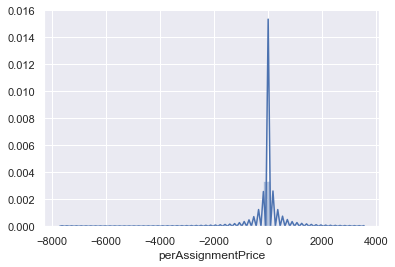

In [294]:
sns.distplot(y_test-y_predictions)


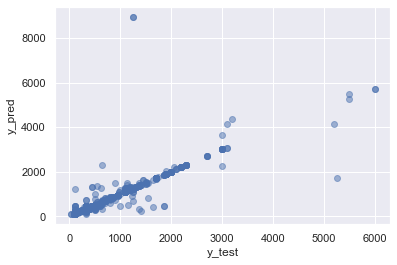

In [295]:
plt.scatter(y_test,y_predictions, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [296]:
from sklearn import metrics

In [297]:
print('MAE:',metrics.mean_absolute_error(y_test,y_predictions))
print('MSE:',metrics.mean_squared_error(y_test,y_predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_predictions)))

MAE: 38.35773200882111
MSE: 97612.54280282032
RMSE: 312.430060658094


In [298]:
metrics.r2_score(y_test,y_predictions)

0.7771734429185718

In [299]:
from sklearn.model_selection import RandomizedSearchCV

In [300]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [301]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [302]:
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [303]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   9.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.9min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=N...


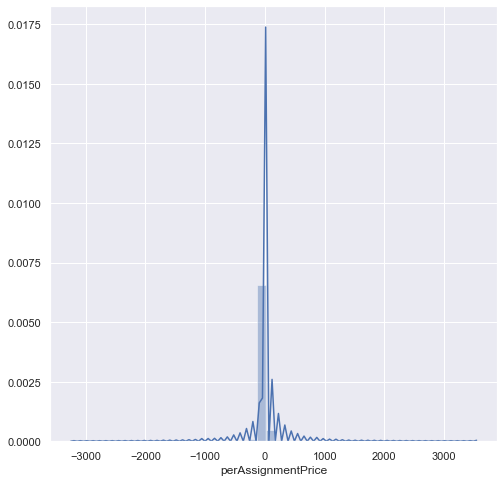

In [304]:
prediction = rf_random.predict(X_test)
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [305]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 34.57082069414005
MSE: 36063.64967489851
RMSE: 189.90431715708442


In [306]:
metrics.r2_score(y_test,prediction)

0.9176751402831377

In [307]:
from sklearn import metrics
import pickle
# open a file, where you ant to store the data
file = open('shipment_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [308]:
model = open('shipment_rf.pkl','rb')
forest = pickle.load(model)
y_prediction = forest.predict(X_test)

In [309]:
metrics.r2_score(y_test,y_prediction)

0.9176751402831377